In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

In [2]:
df_1 = pd.read_csv('../data/data_2__.csv')
df_1 = df_1.drop(['index'],axis=1)

In [3]:
df_1['data'] = pd.to_datetime(df_1['data'])
df_1.set_index('data', inplace=True)

In [4]:
df_1.head()

,valor
data,
2014-07-18,1.50
2014-08-05,83.20
2014-08-08,22.50
2014-08-11,15.91
2014-08-12,0.44


In [5]:
month_data = df_1.resample('M').sum()

In [6]:
month_data

,valor
data,
2014-07-31,1.50
2014-08-31,54228.86
2014-09-30,79707.74
2014-10-31,92994.49
2014-11-30,99751.70
2014-12-31,121334.26
2015-01-31,80715.76
2015-02-28,72224.63
2015-03-31,73179.45


In [7]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [8]:
df = month_data.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2014-07-31,1.50
1,2014-08-31,54228.86
2,2014-09-30,79707.74
3,2014-10-31,92994.49
4,2014-11-30,99751.70


In [9]:
prediction_size = 1
train_df = df[:-prediction_size]

In [10]:
m = Prophet()
m.fit(train_df)

In [11]:
future = m.make_future_dataframe(periods=1)

forecast = m.predict(future)

In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
47,2018-06-30,481842.656837,376062.246986,570477.567246,481842.656837,481842.656837,-11112.890844,-11112.890844,-11112.890844,-11112.890844,-11112.890844,-11112.890844,0.0,0.0,0.0,470729.765993
48,2018-07-31,488576.054670,403369.941027,587736.759440,488576.054670,488576.054670,4927.231020,4927.231020,4927.231020,4927.231020,4927.231020,4927.231020,0.0,0.0,0.0,493503.285690
49,2018-08-31,495309.452504,358892.242804,545428.558800,495309.452504,495309.452504,-43690.621863,-43690.621863,-43690.621863,-43690.621863,-43690.621863,-43690.621863,0.0,0.0,0.0,451618.830641
50,2018-09-30,501825.643955,358827.359695,540575.210285,501825.643955,501825.643955,-50957.141458,-50957.141458,-50957.141458,-50957.141458,-50957.141458,-50957.141458,0.0,0.0,0.0,450868.502497
51,2018-10-01,502042.850337,417800.041915,596200.211452,502042.850337,502042.850337,638.089810,638.089810,638.089810,638.089810,638.089810,638.089810,0.0,0.0,0.0,502680.940147


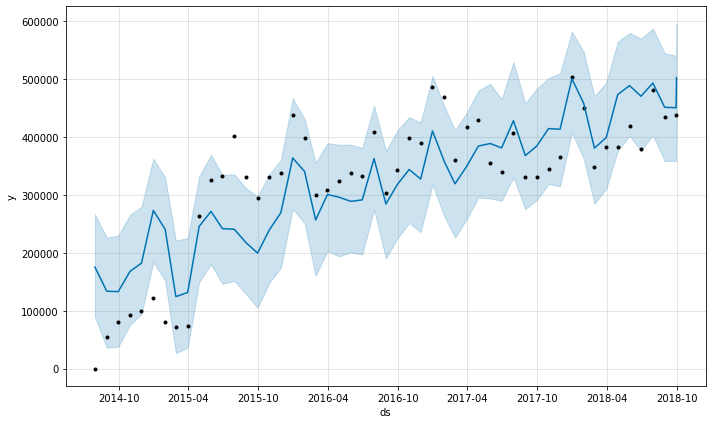

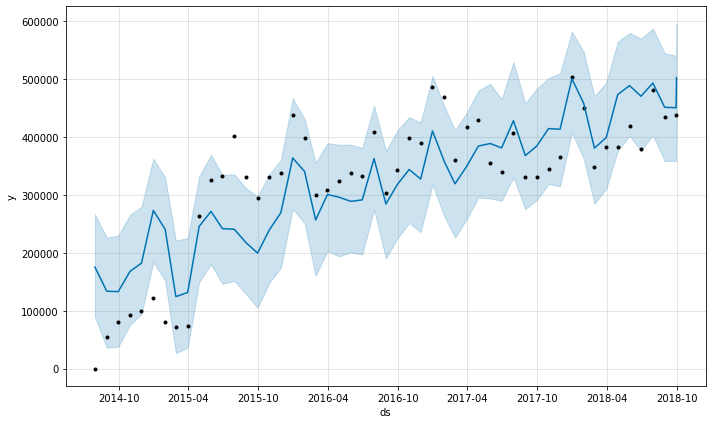

In [13]:
m.plot(forecast)

In [14]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [15]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df = cmp_df.dropna()

In [16]:
print('MAE:', metrics.mean_absolute_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))  
print('MSE:', metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:])))

MAE: 12115.292497137212
MSE: 146780312.29118922
RMSE: 12115.292497137212


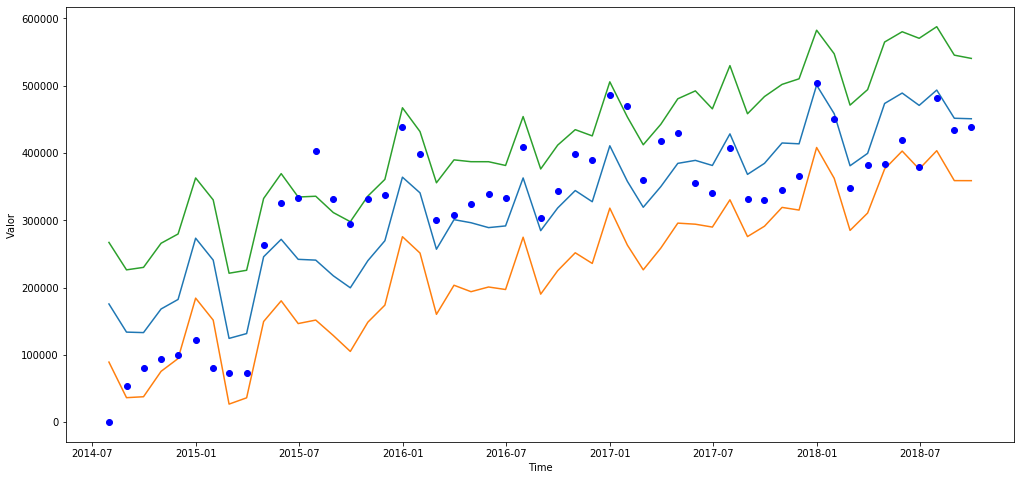

In [17]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'],'bo')
plt.xlabel('Time')
plt.ylabel('Valor')
plt.grid(False)
plt.show()